In [16]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [18]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseValue'] = housing.target  # 目标变量
df.to_csv("california_housing.csv", index=False, encoding="utf-8")


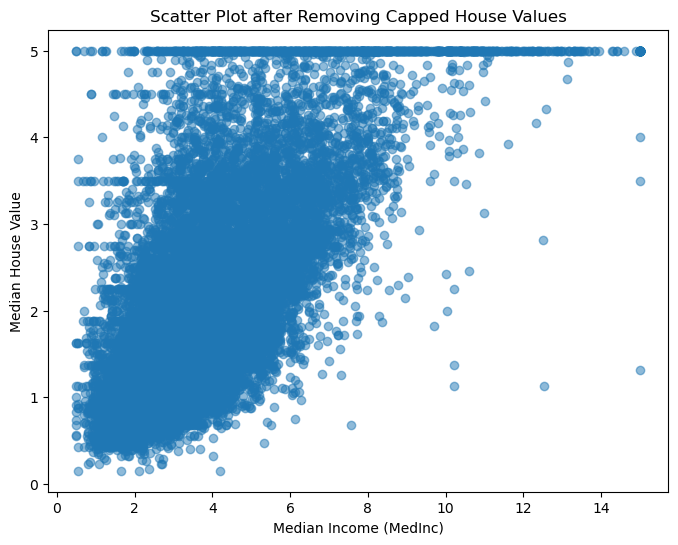

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseValue'] = housing.target  # 目标变量


# 去除被截断的房价数据（房价=5 的数据）
# df = df[df['MedHouseValue'] < 5.0]

# 可视化去除截断数据后的分布
plt.figure(figsize=(8, 6))
plt.scatter(df["MedInc"], df["MedHouseValue"], alpha=0.5)
plt.xlabel("Median Income (MedInc)")
plt.ylabel("Median House Value")
plt.title("Scatter Plot after Removing Capped House Values")
plt.show()

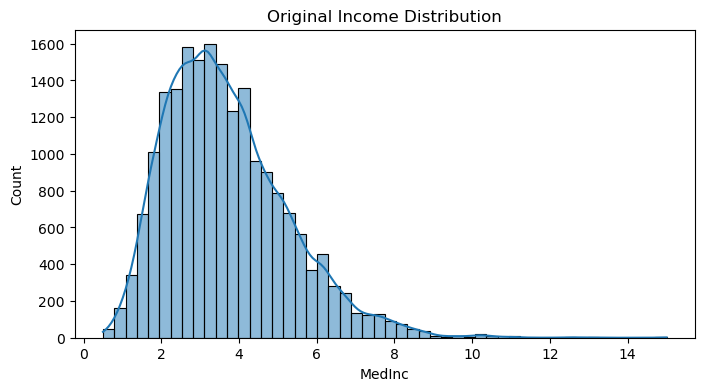

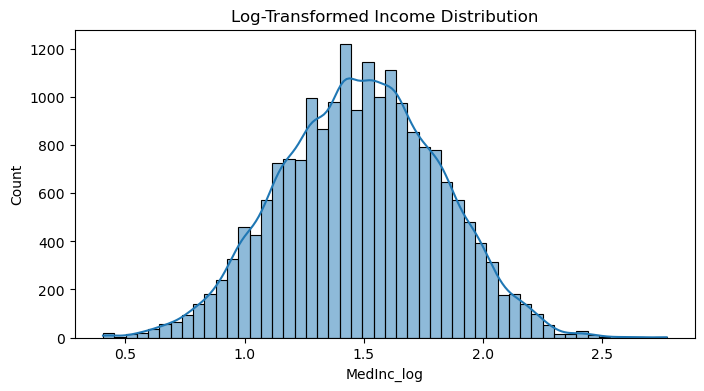

In [8]:
import seaborn as sns

# 绘制原始收入分布
plt.figure(figsize=(8, 4))
sns.histplot(df["MedInc"], bins=50, kde=True)
plt.title("Original Income Distribution")
plt.show()

# 进行对数变换（避免 log(0)）
df["MedInc_log"] = np.log1p(df["MedInc"])

# 绘制对数变换后的收入分布
plt.figure(figsize=(8, 4))
sns.histplot(df["MedInc_log"], bins=50, kde=True)
plt.title("Log-Transformed Income Distribution")
plt.show()

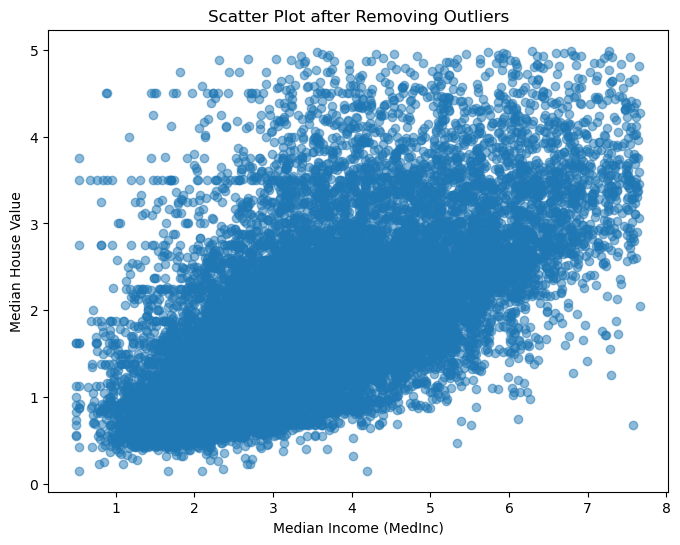

In [10]:
# 计算 IQR
Q1 = df["MedInc"].quantile(0.25)
Q3 = df["MedInc"].quantile(0.75)
IQR = Q3 - Q1

# 设置正常范围（1.5倍IQR规则）
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 过滤掉异常值
df = df[(df["MedInc"] >= lower_bound) & (df["MedInc"] <= upper_bound)]

# 可视化异常值处理后的散点图
plt.figure(figsize=(8, 6))
plt.scatter(df["MedInc"], df["MedHouseValue"], alpha=0.5)
plt.xlabel("Median Income (MedInc)")
plt.ylabel("Median House Value")
plt.title("Scatter Plot after Removing Outliers")
plt.show()

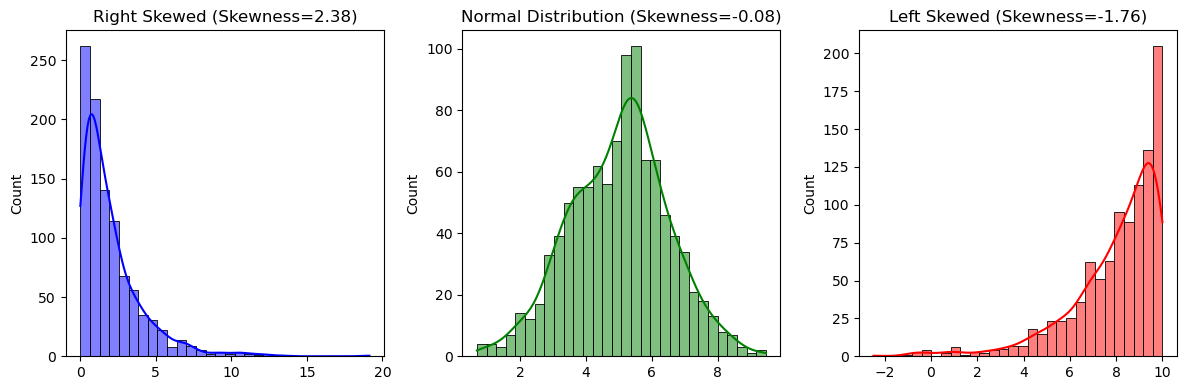

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# 生成示例数据
data_right_skew = np.random.exponential(scale=2, size=1000)  # 右偏
data_left_skew = np.random.exponential(scale=2, size=1000) * -1 + 10  # 左偏
data_normal = np.random.normal(loc=5, scale=1.5, size=1000)  # 近似正态

# 绘制直方图
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.histplot(data_right_skew, kde=True, bins=30, color="blue")
plt.title(f"Right Skewed (Skewness={skew(data_right_skew):.2f})")

plt.subplot(1, 3, 2)
sns.histplot(data_normal, kde=True, bins=30, color="green")
plt.title(f"Normal Distribution (Skewness={skew(data_normal):.2f})")

plt.subplot(1, 3, 3)
sns.histplot(data_left_skew, kde=True, bins=30, color="red")
plt.title(f"Left Skewed (Skewness={skew(data_left_skew):.2f})")

plt.tight_layout()
plt.show()